# Preprocessing steps

In [ ]:
# important libraries
from pdf2image import convert_from_path
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import torch
import utils
display = utils.notebook_init()  # checks
from detect import run
import torch


### Read PDF and convert to JPG

In [1]:
def pdf_to_jpg(pdf_path,output_path):
    '''
    convert pdf file to jpg
    -arg pdf_path: path to pdf, output_path: path to save the img files.
    
    '''

    for filename in glob.glob(pdf_path+'/*.pdf'):
        if filename.split('\\')[-1][:-4] not in os.listdir(output_path):
            
            os.mkdir(os.path.join(output_path))
        images = convert_from_path(os.path.join(pdf_path,pdf),'500')
    
        for count, page in enumerate(images):
            page.save(output_path+str(count)+'.jpg','JPEG')
        print(pdf)
    return()
    
    

In [ ]:
pdf_path = "C:/Users/A/datasets/ingescande toetsen"
output_path = "C:/Users/A/datasets/ingescande toetsen/"

pdf_to_jpg(pdf_path,output_path)

#### Show plot function for opencv2

In [2]:
def show_wait_destroy(winname, img):
    ''' function to show opencv2 image 
    -arg winname: windowname, img: image file'''
    cv2.namedWindow(winname, cv2.WINDOW_NORMAL)
    cv2.imshow(winname, img)    
    cv2.waitKey(0)
    cv2.destroyWindow(winname)

# Custom model to detect handwritting digits with YOLOv5

#### Labeling images with LabelImg

In [3]:
# anaconda prompt -> cd labelImg -> python labelImg.py (https://github.com/tzutalin/labelImg)

#### Setup YOLOv5

In [97]:
#!git clone https://github.com/ultralytics/yolov5  # clone
#%cd yolov5
#%pip install -qr requirements.txt  # install

#import torch
#import utils
#display = utils.notebook_init()  # checks

#### Train on Custom Data

In [5]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
!python train.py --img 640 --batch 32 --epochs 300 --data cito_vragennr.yaml --weights yolov5s.pt --cache

####  Detect YOLOv5s on custom data

In [6]:
weights = "C:/Users/A/yolov5/runs/train/exp64/weights/best.pt"
source = "C:\\Users\\A\\datasets\\Toetsen\\Toetsen pdf's\\"
data = "data/cito_vragennr.yaml"
name = "toets"
classes=1
save_crop = True

In [7]:
def yolov5_loop(weights,source,data,name):
    run(weights,source,data,save_crop=True,classes=1,name=name)
    return

In [ ]:
for toetsen in os.listdir(source):
    for toets in os.listdir(source+'\\'+toetsen):
        if toets == 'Individual questions':
            source2 = source+toetsen+'\\'+toets
            yolov5_loop(weights,source2,data,name=toetsen)
            
            
            

#### Create dataframe with coordinates of bounding boxes (x1,x2,y1,y2), confidence, class and name

In [ ]:


model = torch.hub.load('ultralytics/yolov5', 'custom', weights)  # custom trained model

images = "C:\\Users\\A\\datasets\\Toetsen\\Toetsen pdf's\\"
df_info = pd.DataFrame()


for toetsen in os.listdir(source):
    for toets in os.listdir(source+'\\'+toetsen):
        if toets == 'Individual questions':
            source2 = source+toetsen+'\\'+toets
            for img in os.listdir(source2):
                print(source2+'\\'+img)
                results = model(source2+'\\'+img)
                df_temp = results.pandas().xyxy[0]
                df_temp['image'] = source2 + '\\' + img
                df_info = df_info.append(df_temp)
df_info.to_csv("bounding_boxes_dataframe.csv",index=False,sep=';')

In [58]:
df_info = pd.read_csv("bounding_boxes_dataframe.csv",sep=';')

In [59]:
df_info.head()

,xmin,ymin,xmax,ymax,confidence,class,name,image,toets,toets_nr
0,883.938599,937.804321,1237.929199,1243.394409,0.897818,1,handwritten,C:\Users\A\datasets\Toetsen\ToetsData\toets0\I...,toets0,1.png
1,1523.222656,15.951954,2044.997925,360.201172,0.867211,1,handwritten,C:\Users\A\datasets\Toetsen\ToetsData\toets0\I...,toets0,10.png
2,920.496704,733.262390,1331.285400,997.355042,0.922358,1,handwritten,C:\Users\A\datasets\Toetsen\ToetsData\toets0\I...,toets0,11.png
3,1516.894653,81.683037,2069.288330,461.436035,0.907738,1,handwritten,C:\Users\A\datasets\Toetsen\ToetsData\toets0\I...,toets0,12.png
4,1097.577759,885.490234,1409.795532,1165.316650,0.882228,1,handwritten,C:\Users\A\datasets\Toetsen\ToetsData\toets0\I...,toets0,13.png


In [60]:
# Split column to get test and testnr

split_column = df_info["image"].str.split("\\",expand=True)
df_info['toets'] = split_column[6]
df_info['toets_nr'] = split_column[8]

#### Distribution of total objects within each test

<AxesSubplot:xlabel='toets'>

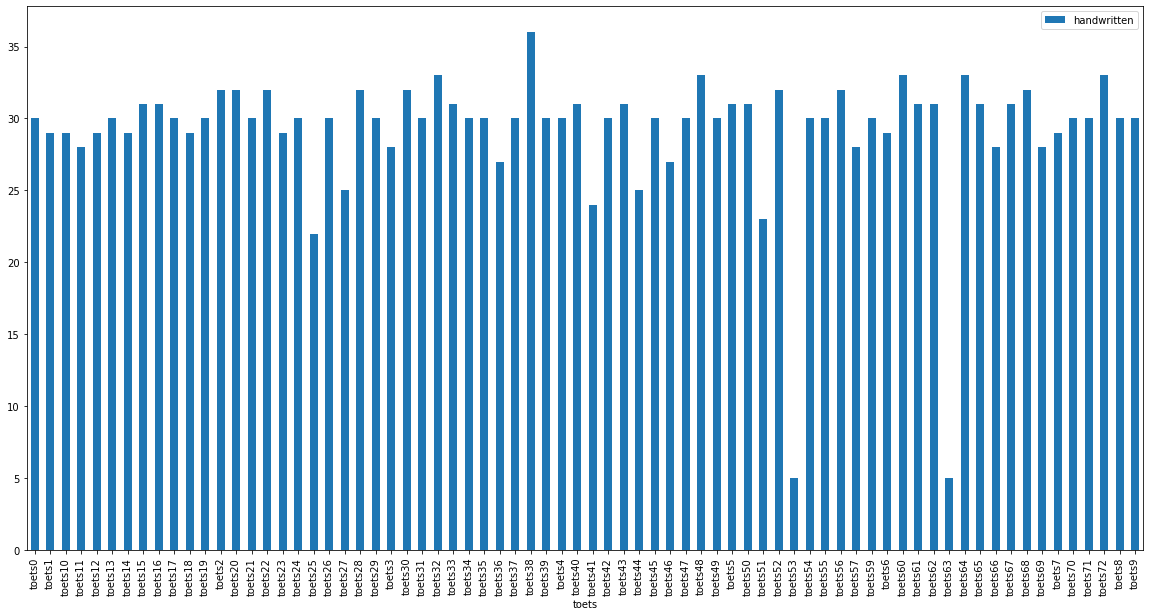

In [64]:

%matplotlib inline
df_info.groupby(['toets','name'])['class'].count().unstack().plot.bar(y='handwritten',figsize=(20,10))


#### Compute mean of x and y values

In [90]:
df_info["xCenter"] = (df_info["xmin"] + df_info["xmax"]) /2
df_info["yCenter"] = (df_info["ymin"] + df_info["ymax"]) /2

#### Plot the x and y center of all tests

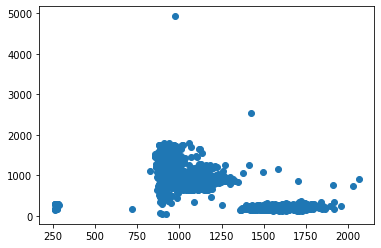

In [91]:

df_handwritten = df_info[df_info.name == 'handwritten'].reset_index()

x = df_handwritten["xCenter"]
y = df_handwritten["yCenter"]

plt.scatter(x, y)
plt.show()

#### Count the objects class for each test and test number

In [92]:

df_new_handwritten = df_handwritten.groupby(['toets','toets_nr'])['class'].count().reset_index()

#### Plot the x and y centers for each test

1.png


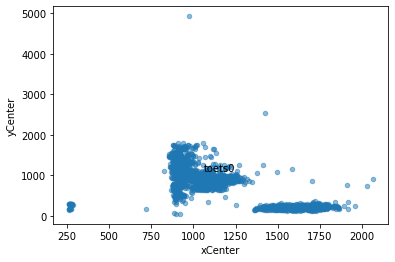

<Figure size 1080x864 with 0 Axes>

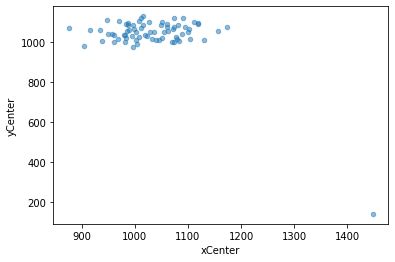

10.png


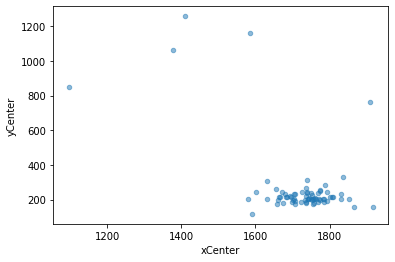

11.png


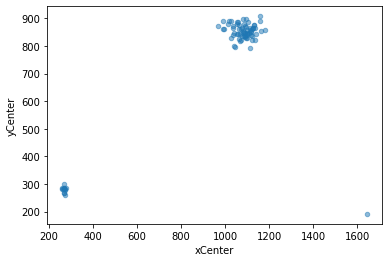

12.png


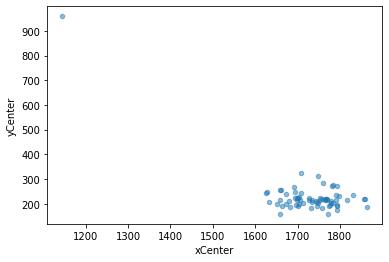

13.png


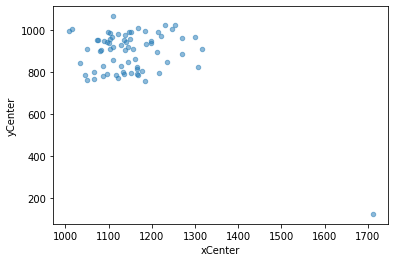

14.png


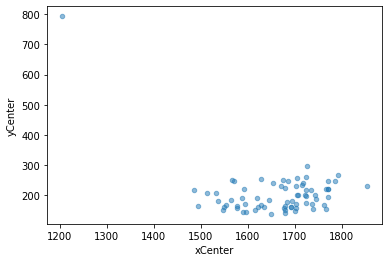

15.png


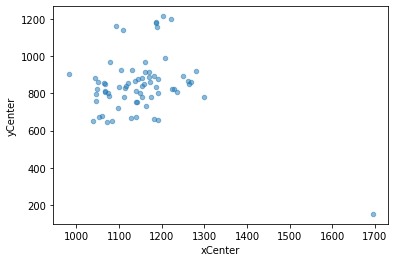

16.png


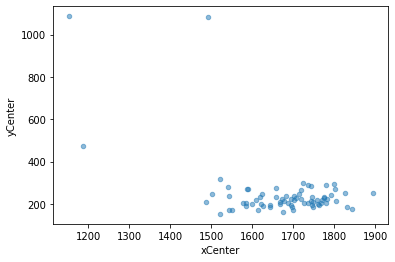

17.png


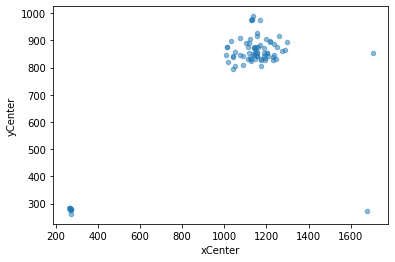

18.png


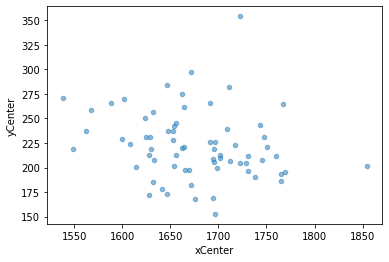

19.png


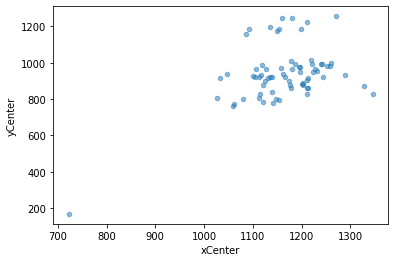

2.png


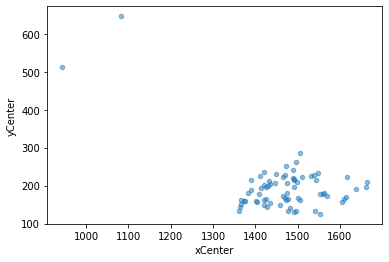

20.png


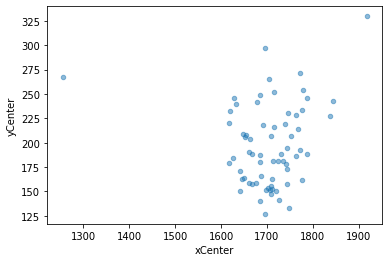

21.png


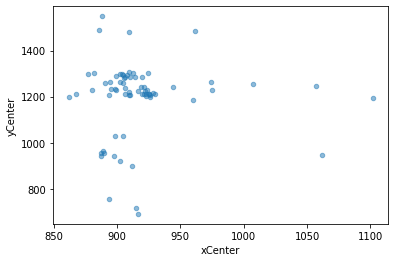

22.png


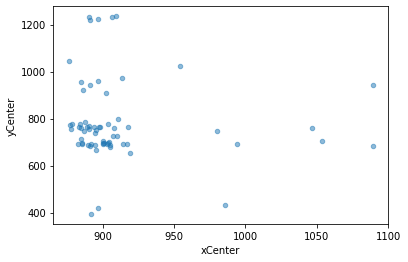

23.png


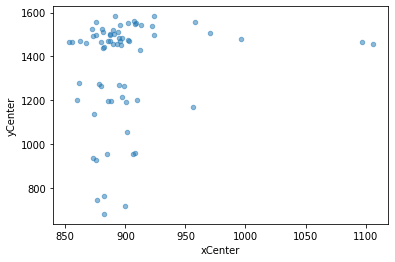

24.png


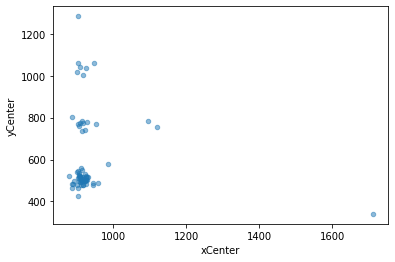

25.png


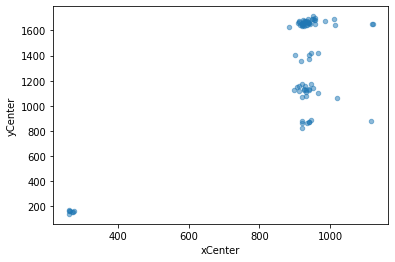

26.png


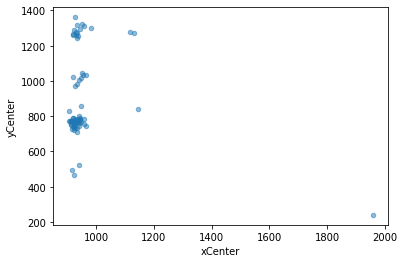

27.png


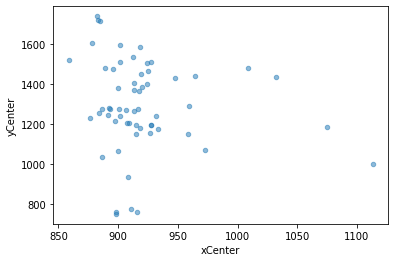

28.png


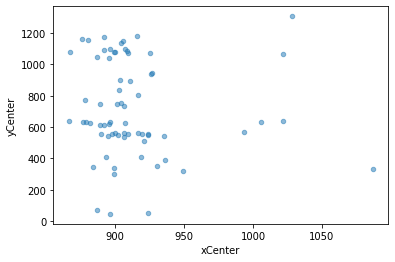

29.png


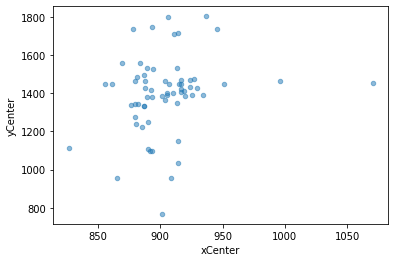

3.png


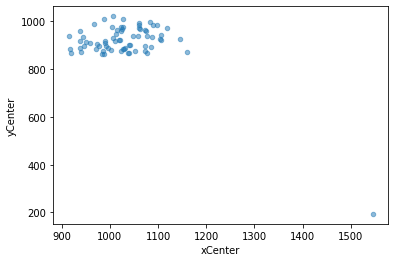

30.png


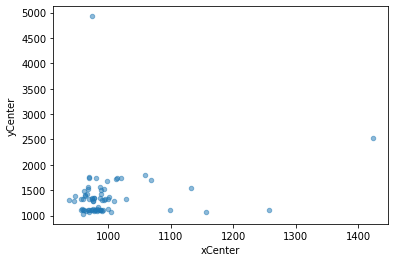

4.png


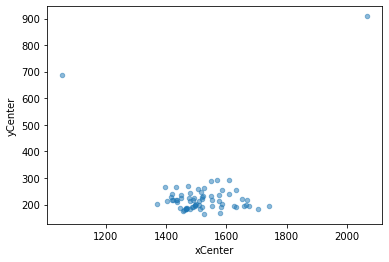

5.png


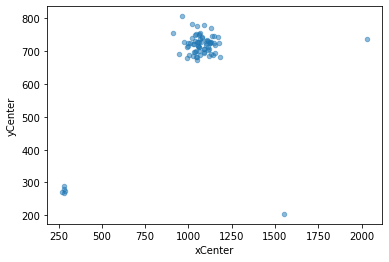

6.png


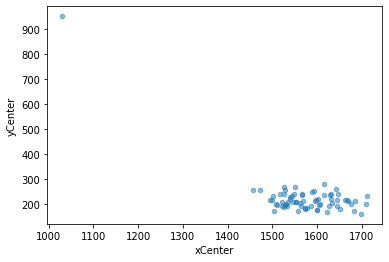

7.png


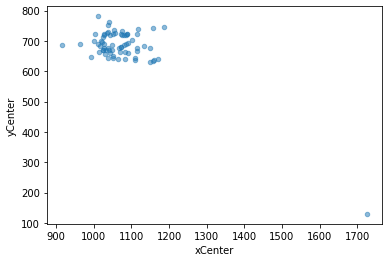

8.png


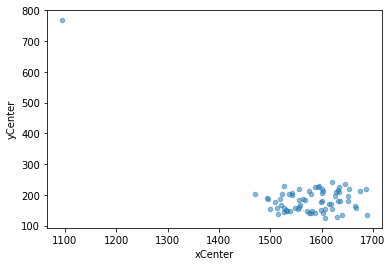

9.png


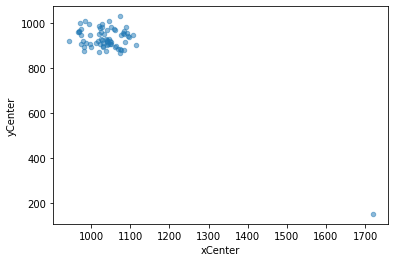

In [93]:
# define subplot grid
ax = df_handwritten.plot.scatter(x='xCenter', y='yCenter', alpha=0.5)
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Daily closing prices", fontsize=18, y=0.95)
tickers = list(df_handwritten['toets_nr'].unique())

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    print(ticker)

    df_handwritten[df_handwritten["toets_nr"] == ticker].plot.scatter(x='xCenter', y='yCenter', alpha=0.5)
    ax.annotate(df_handwritten.toets.iat[n], (df_handwritten.xCenter.iat[n],df_handwritten.yCenter.iat[n]))
    plt.show()


#### Plot the total objects (handwritten) for all the questions within each test

toets0


<Figure size 1080x864 with 0 Axes>

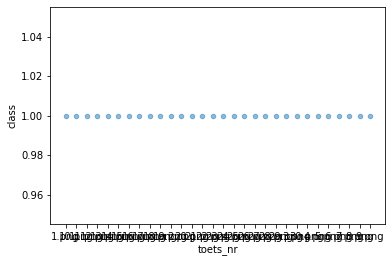

toets1


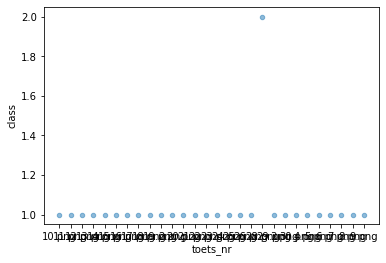

toets10


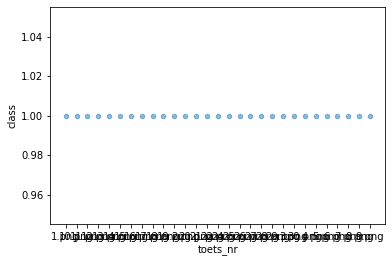

toets11


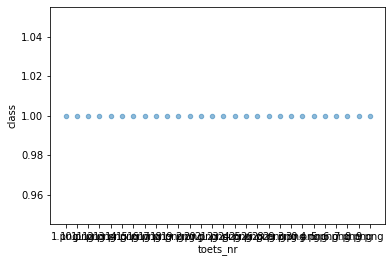

toets12


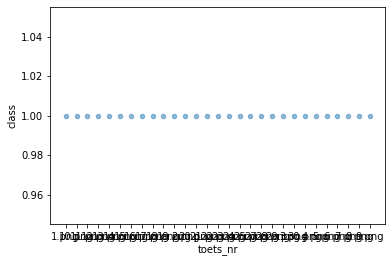

toets13


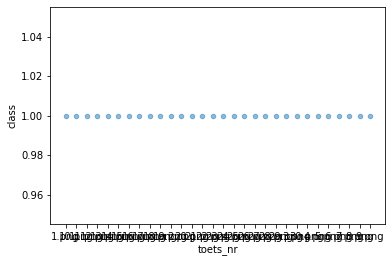

toets14


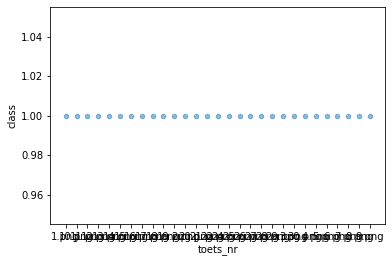

toets15


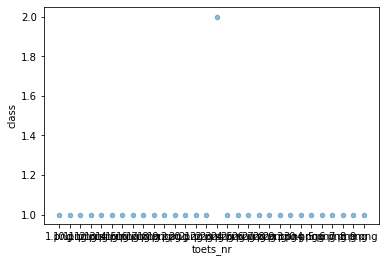

toets16


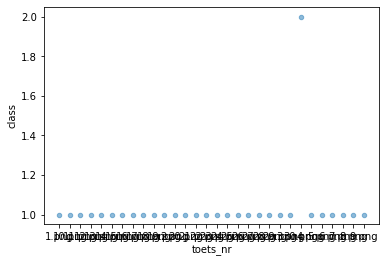

toets17


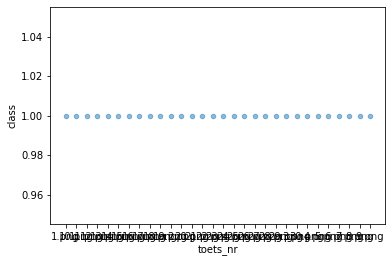

toets18


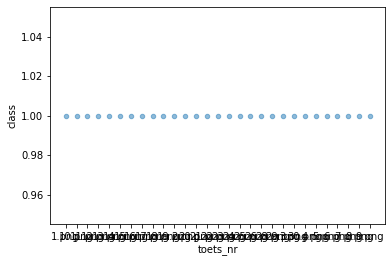

toets19


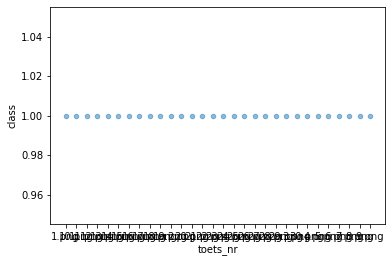

toets2


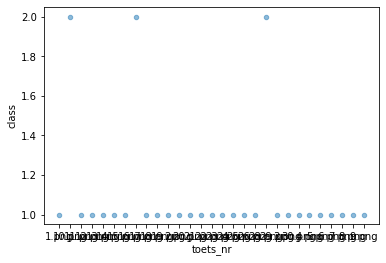

toets20


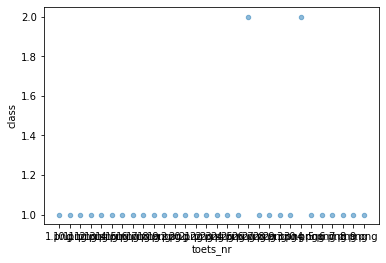

toets21


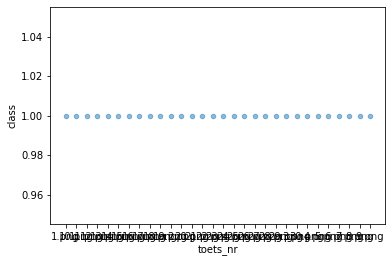

toets22


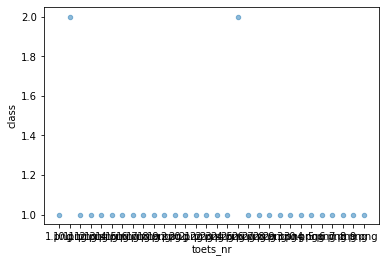

toets23


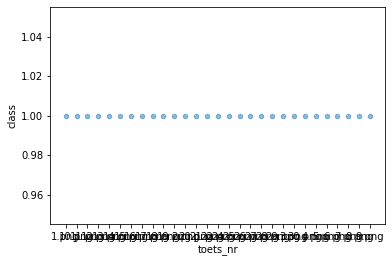

toets24


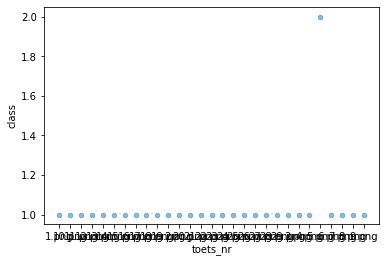

toets25


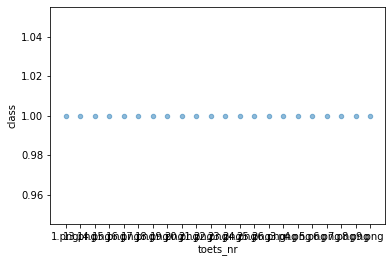

toets26


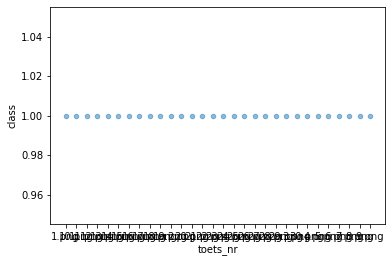

toets27


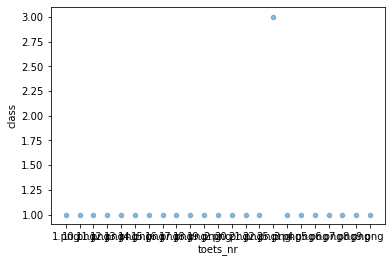

toets28


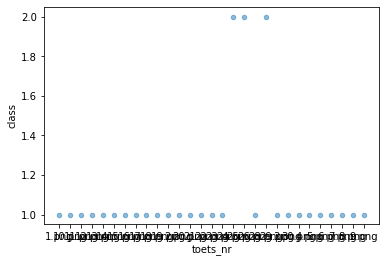

toets29


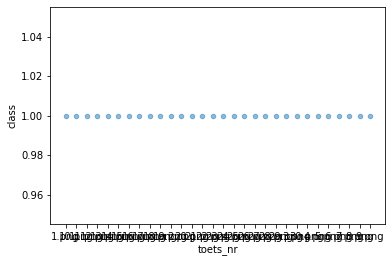

toets3


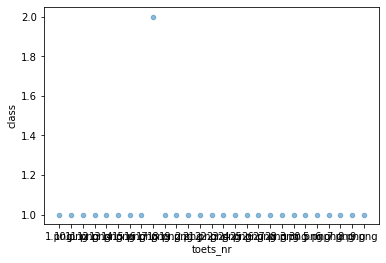

toets30


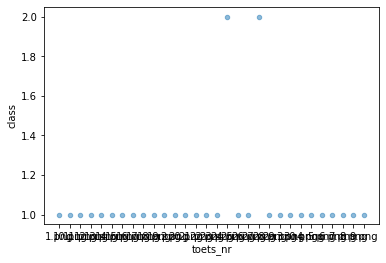

toets31


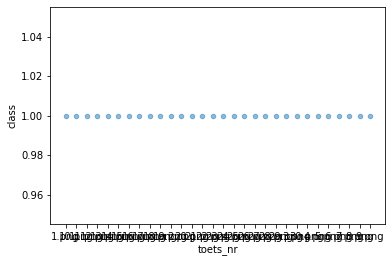

toets32


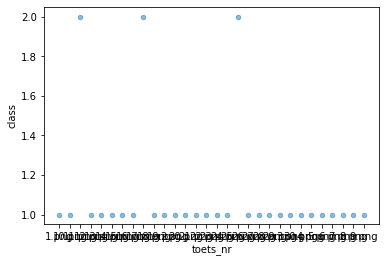

toets33


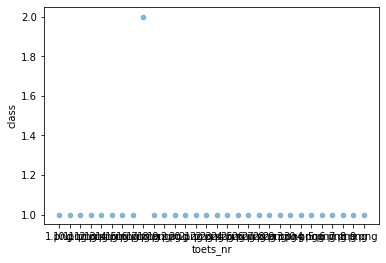

toets34


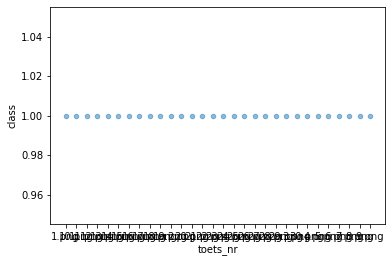

toets35


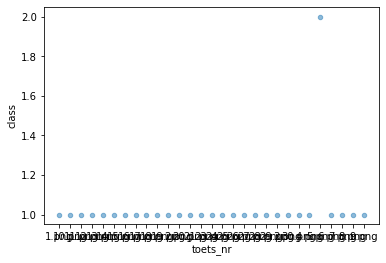

toets36


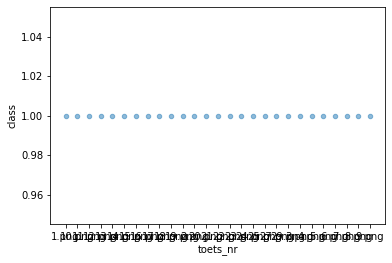

toets37


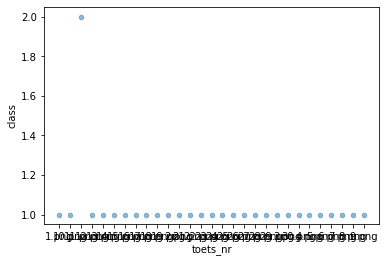

toets38


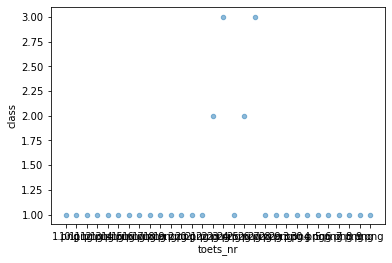

toets39


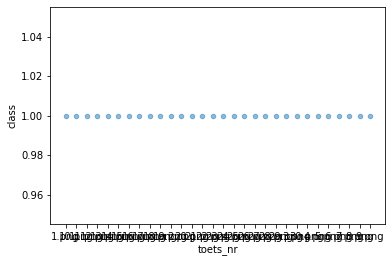

toets4


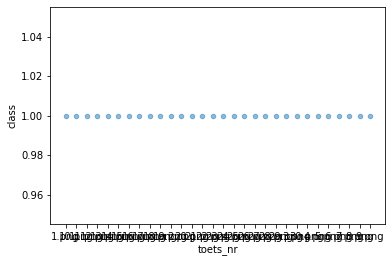

toets40


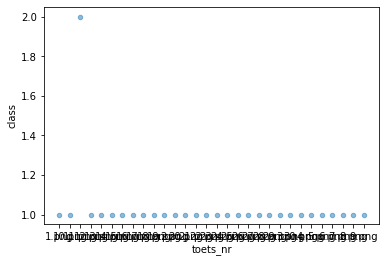

toets41


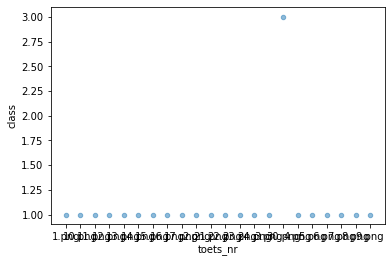

toets42


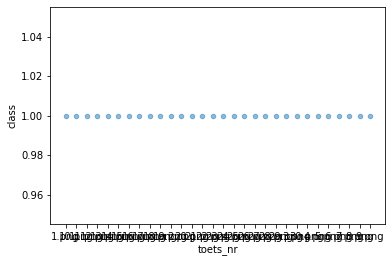

toets43


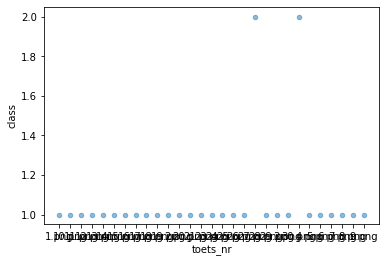

toets44


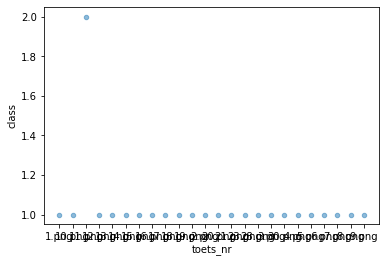

toets45


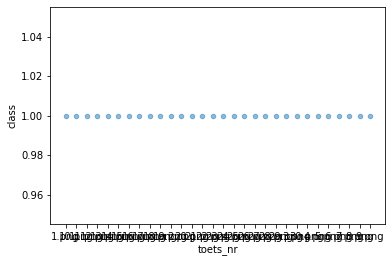

toets46


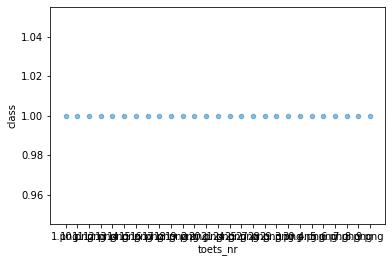

toets47


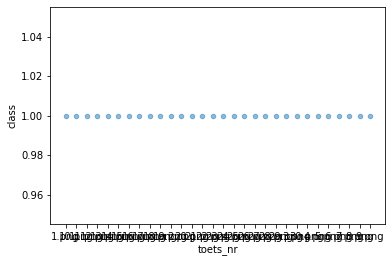

toets48


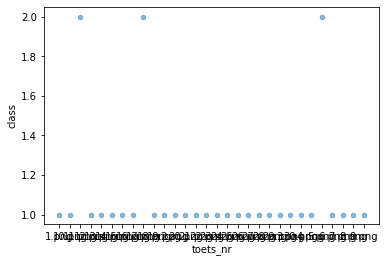

toets49


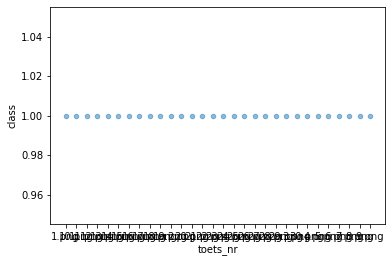

toets5


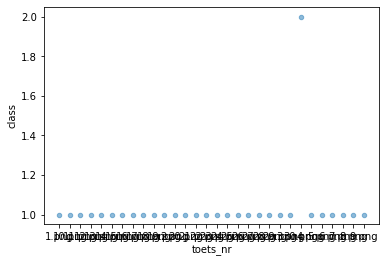

toets50


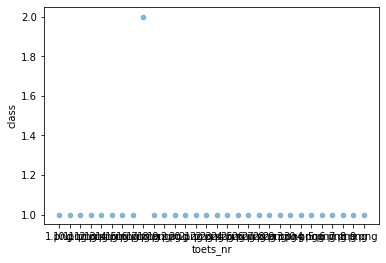

toets51


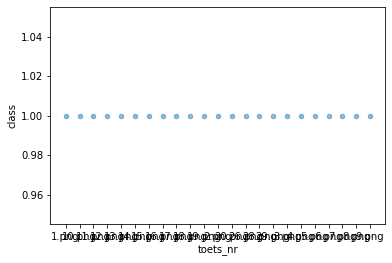

toets52


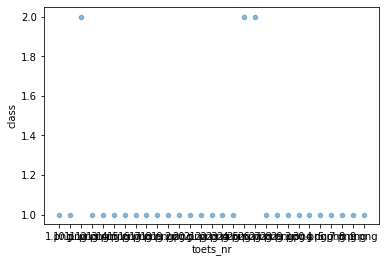

toets53


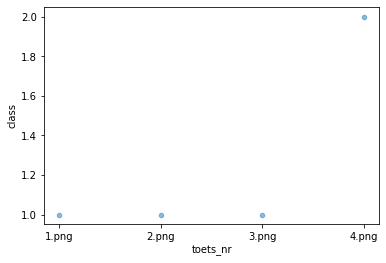

toets54


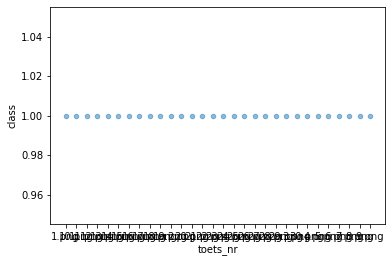

toets55


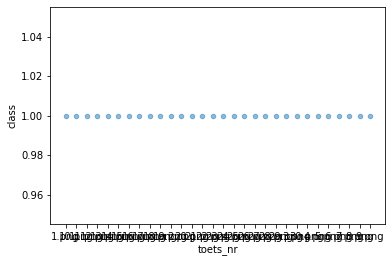

toets56


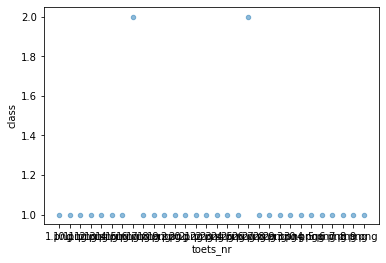

toets57


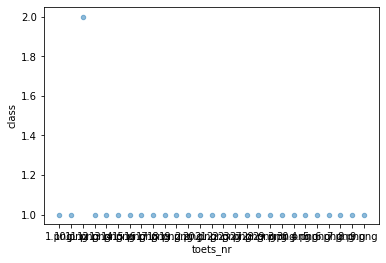

toets59


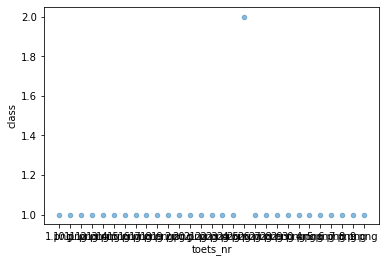

toets6


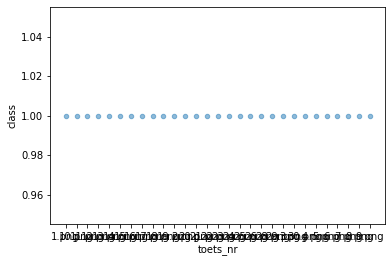

toets60


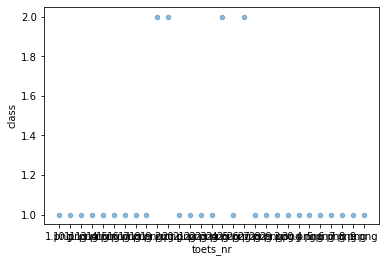

toets61


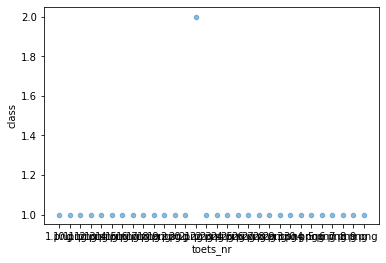

toets62


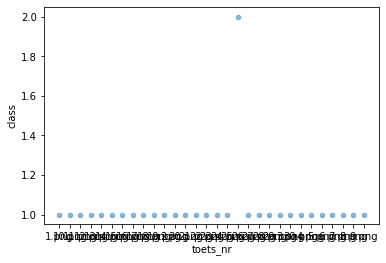

toets63


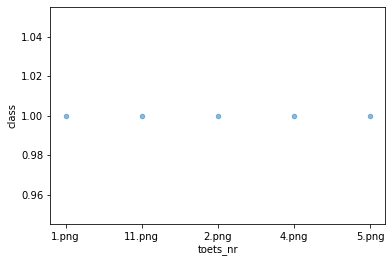

toets64


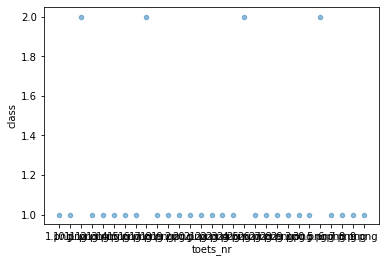

toets65


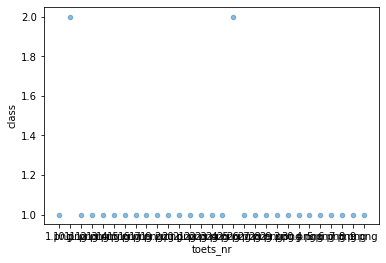

toets66


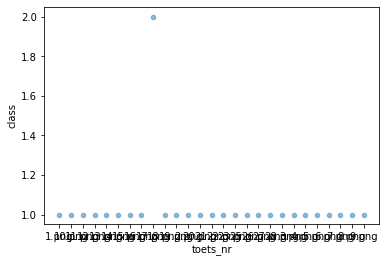

toets67


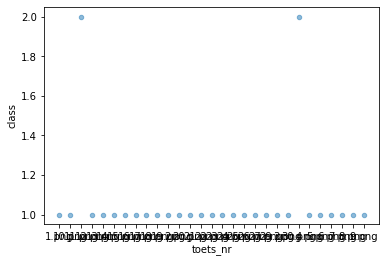

toets68


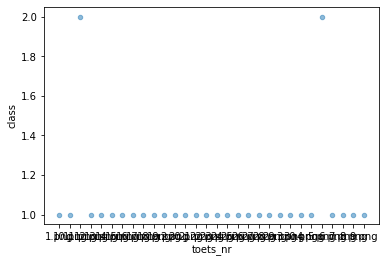

toets69


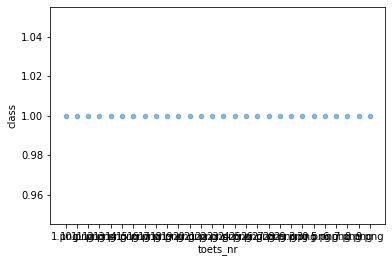

toets7


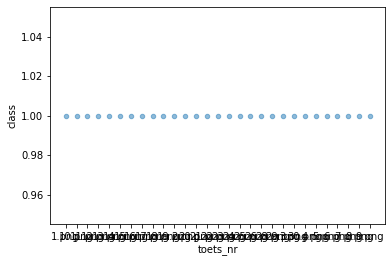

toets70


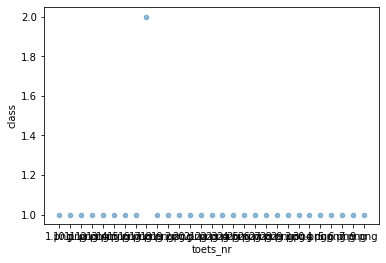

toets71


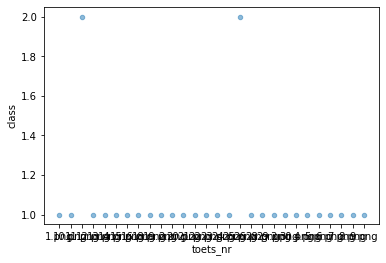

toets72


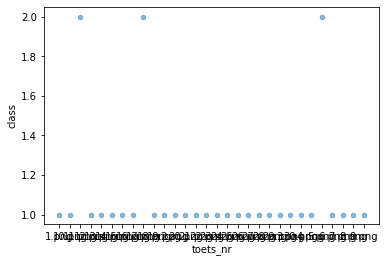

toets8


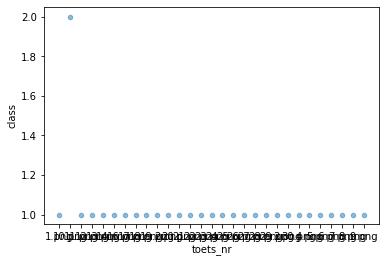

toets9


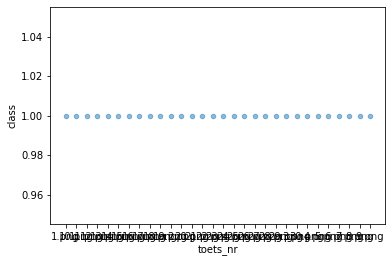

In [87]:
df_new_handwritten = df_handwritten.groupby(['toets','toets_nr'])['class'].count().reset_index()
# define subplot grid
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("", fontsize=18, y=0.95)
tickers = list(df_new_handwritten['toets'].unique())
# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    print(ticker)
    df_new_handwritten[df_new_handwritten["toets"] == ticker].plot.scatter(x='toets_nr', y='class', alpha=0.5)

    plt.show()


#### Boxplot of the confidence scores for all tests

{'whiskers': [<matplotlib.lines.Line2D at 0x2d070662ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d07066f0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d0706627f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d07066f640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d07066f910>],
 'means': []}

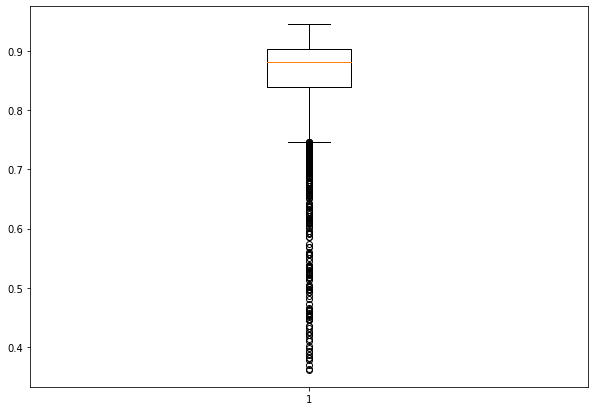

In [73]:
# get confindence of handwritten classes
confidence_prop = df_info[df_info.name == 'handwritten'].confidence.reset_index()
data = np.array(confidence_prop.confidence)
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)

#### Histogram of the confidence scores for all tests

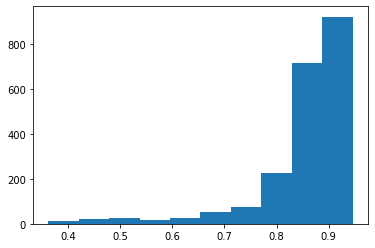

In [96]:
hist, bin_edges = np.histogram(data)


x = data

plt.hist(x)
plt.savefig("bin_graph.png")